In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os #chdir 사용시 필요함
import glob #파일 경로
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# 잘 나온 이미지만을 가져오기 위해서 크롤러 대신 수작업을 선택해야 할지도 모르겠습니다.

#1. 클러스터링 (rgb)

import cv2 # 색상감지를 위한 opencv활용
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc

In [ ]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist
    
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [ ]:
import cv2
import matplotlib.colors as cs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_[1:])

    print("hist",hist,"\n" "clu",clt.cluster_centers_[1:])
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

In [ ]:
for i in range(1,2):
  images='/content/drive/MyDrive/sample (1)/3. background remove/80imagespng/abandoned'+str(i)+'.png'
  print(i)
  image = mpimg.imread(images)
  plt.imshow(image)
  
  image_color_cluster(images)

1


FileNotFoundError: ignored

1
hist [0.81388148 0.04625185 0.06117778 0.02775556 0.05093333] 
clu [[181.04720447 148.73378594 122.46557508]
 [137.79234873 101.95816661  80.7965927 ]
 [218.05992011 194.98468708 175.58774967]
 [ 90.76566142  62.11960956  49.2352127 ]]


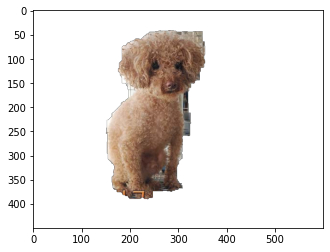

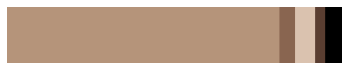

In [ ]:
for i in range(1,2):
  images='/content/drive/MyDrive/sample (1)/3. background remove/80imagespng/abandoned'+str(i)+'.png'
  print(i)
  image = mpimg.imread(images)
  plt.imshow(image)
  
  image_color_cluster(images)

1
hist [0.81388519 0.04622222 0.05098889 0.02775556 0.06114815] 
clu [[181.03783567 148.73314629 122.46533066]
 [ 90.84119143  62.17362877  49.27330185]
 [218.01354042 194.91716448 175.4955529 ]
 [137.87553101 102.03562326  80.86211919]]


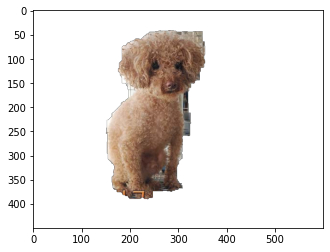

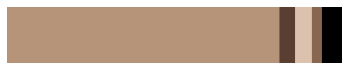

2
hist [0.8074037  0.06215185 0.03876667 0.01829259 0.07338519] 
clu [[176.78316843 133.92645131 100.14155442]
 [122.32120118  69.74503469  42.31958567]
 [202.07631897 188.08799839 174.37011679]
 [157.54830697 100.90156123  63.62393552]]


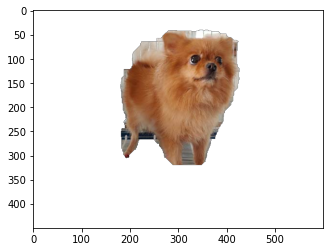

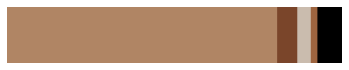

3
hist [0.66487778 0.15031111 0.1290963  0.00868889 0.04702593] 
clu [[175.0889535  190.83909519 206.8067171 ]
 [192.30071558 214.07644337 229.00040233]
 [ 70.35935511  71.14467543  75.23249894]
 [153.26592906 159.07274011 165.63331764]]


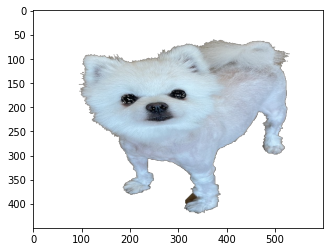

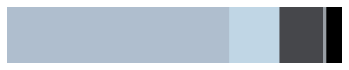

4
hist [0.86828148 0.03401111 0.04073333 0.03591852 0.02105556] 
clu [[141.96199913 122.88044425 102.42345383]
 [109.05943739  88.30635209  69.05317604]
 [ 76.64872404  57.08533939  42.40262424]
 [168.02497362 157.12521984 143.58248329]]


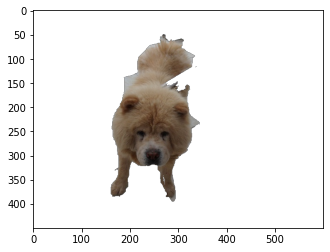

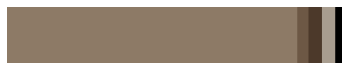

5
hist [0.77538148 0.07912963 0.02977407 0.10665556 0.00905926] 
clu [[ 77.22107089  71.85873031  73.32398725]
 [134.23465704 120.42462343 112.08826092]
 [ 41.00821747  39.88110676  47.93145175]
 [195.93562936 175.50471505 159.85772858]]


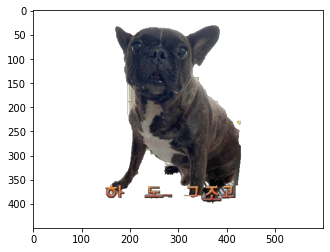

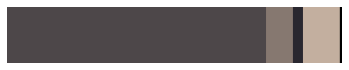

6
hist [0.10021852 0.73940741 0.06417778 0.03202593 0.06417037] 
clu [[1.25360664e-01 1.09266050e-01 1.08870321e-01]
 [1.40656405e+02 1.23328864e+02 1.05698354e+02]
 [8.82121459e+01 7.45537941e+01 6.27549831e+01]
 [1.83877420e+02 1.71509451e+02 1.57922314e+02]]


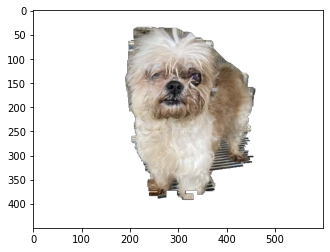

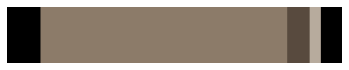

7
hist [0.79421852 0.06307407 0.02723333 0.05852963 0.05694444] 
clu [[105.92963289  91.8733627   80.70372981]
 [197.92414819 184.82057869 171.40481341]
 [ 66.27446376  50.52037061  40.65135169]
 [146.83558705 131.95793785 119.66252763]]


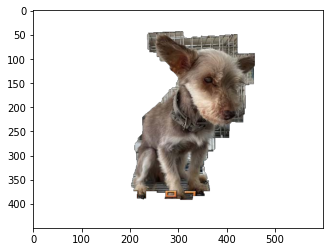

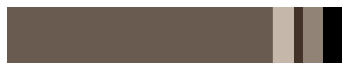

8
hist [0.80407037 0.03742963 0.044      0.05793704 0.05656296] 
clu [[186.94432949 163.77396788 138.12198246]
 [ 78.30624789  52.17867969  31.31062647]
 [118.55846735  89.45562888  63.65855065]
 [155.98991288 125.9654811   97.0956311 ]]


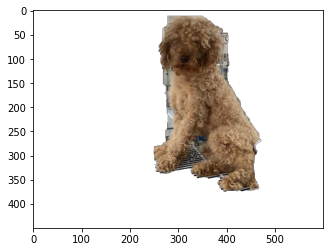

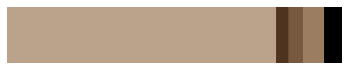

9
hist [0.79611481 0.06375185 0.0213     0.06885926 0.04997407] 
clu [[ 98.50455574  51.85067611  32.26939818]
 [160.40185121 121.65979742 101.78239609]
 [ 54.94000645  23.03531878  14.56375659]
 [131.34925462  82.48082771  57.52503152]]


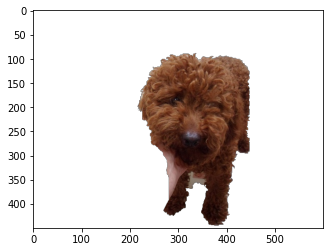

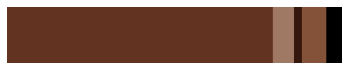

10
hist [0.83113333 0.04228889 0.06555556 0.01570741 0.04531481] 
clu [[169.66961239 142.4878817  121.97392598]
 [126.31188622 101.24935094  79.09143244]
 [225.47599905 212.19910144 201.59210215]
 [ 92.51035273  56.8569441   31.19666094]]


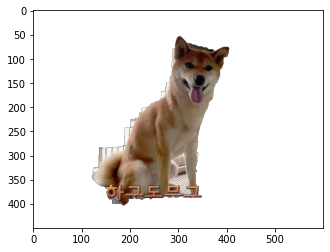

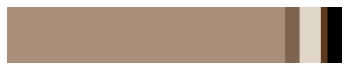

11
hist [0.8354     0.05045926 0.03903333 0.02452593 0.05058148] 
clu [[176.25747093 168.10186957 155.6405859 ]
 [100.08799622  80.74111531  70.181569  ]
 [226.13794663 220.94331373 213.20488467]
 [141.7742172  127.89425827 115.97587446]]


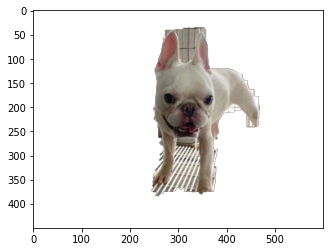

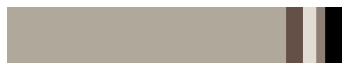

12
hist [0.25136858 0.19483237 0.14873532 0.23244825 0.17261548] 
clu [[176.59073181 174.91262958 170.07987786]
 [219.29146864 219.80186739 218.49654498]
 [137.79756694 132.67415465 125.99663148]
 [ 51.53602547  52.54259661  50.52100159]]


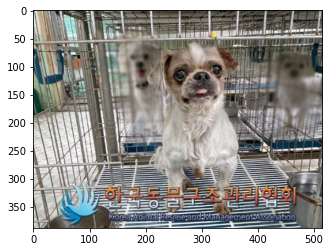

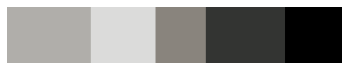

13
hist [0.22248926 0.21028156 0.2500029  0.12167734 0.19554894] 
clu [[180.69159932 177.83932597 171.46352191]
 [144.35656031 139.535961   131.51472865]
 [ 61.69721362  56.77175518  51.67616099]
 [222.25527996 220.68522204 218.41868409]]


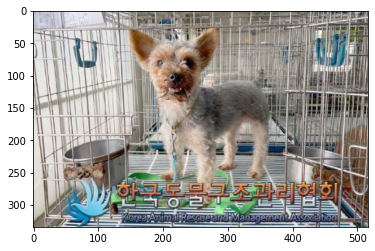

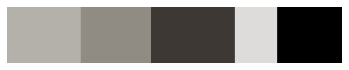

14
hist [0.08625185 0.74178148 0.06024444 0.08054815 0.03117407] 
clu [[  0.351111     0.24139911   0.2697758 ]
 [147.25276957 131.82840965 122.81117676]
 [203.57180229 200.94070402 194.63701868]
 [ 97.35056234  82.1988514   80.03876525]]


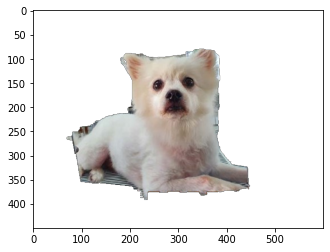

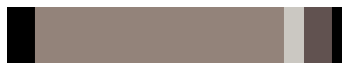

15
hist [0.77335185 0.07601481 0.03434815 0.03538889 0.0808963 ] 
clu [[202.47890398 198.00392822 192.44471387]
 [142.86228516 127.0119987  115.79785969]
 [ 92.43092999  70.5476489   60.34378265]
 [176.39997242 167.02615611 158.22212007]]


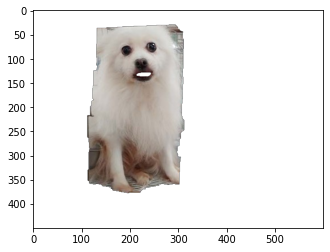

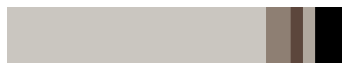

16
hist [0.78815926 0.06305185 0.0280963  0.09045556 0.03023704] 
clu [[120.85498079 113.18462903 106.46449897]
 [208.99013158 208.57815789 209.61223684]
 [ 85.44174955  80.82325126  76.29618458]
 [163.1622053  157.07870825 152.019278  ]]


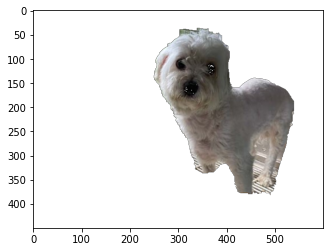

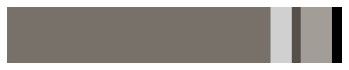

17
hist [0.0174     0.85591852 0.05112963 0.0415963  0.03395556] 
clu [[6.61018269e-02 5.70017914e-02 5.79321327e-02]
 [1.16948857e+02 1.11016059e+02 1.03501013e+02]
 [7.73693758e+01 7.33487462e+01 6.96186200e+01]
 [1.56997049e+02 1.47197049e+02 1.37941093e+02]]


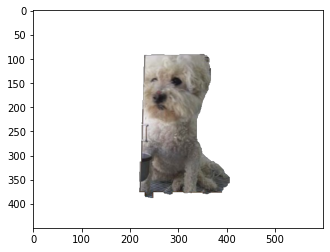

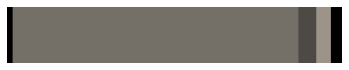

18
hist [0.80052222 0.06988519 0.04074815 0.05440741 0.03443704] 
clu [[177.61968184 147.85925691 121.15490725]
 [140.13473054 106.57149338  80.0085284 ]
 [210.84265901 188.17722211 164.78820797]
 [ 74.81940556  44.72431617  26.87594228]]


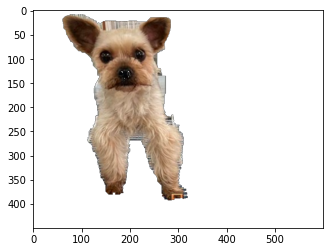

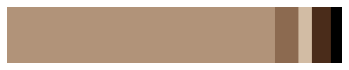

19
hist [0.57054815 0.12264815 0.13630741 0.08947778 0.08101852] 
clu [[113.23115927  95.58376845  78.89176953]
 [138.54222513 131.58325161 122.8687752 ]
 [ 83.75228188  59.44021873  41.18542883]
 [169.40163408 171.87817865 172.62044432]]


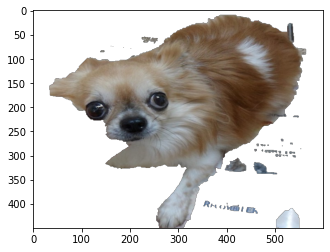

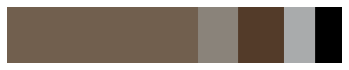

20
hist [0.07321111 0.75676296 0.05179259 0.06699259 0.05124074] 
clu [[2.28139041e-01 1.25165187e-01 1.99604530e-01]
 [1.10729146e+02 1.05869100e+02 9.73374447e+01]
 [2.00913801e+02 2.00024992e+02 1.87131372e+02]
 [7.87523554e+01 3.60213074e+01 4.25334831e+01]]


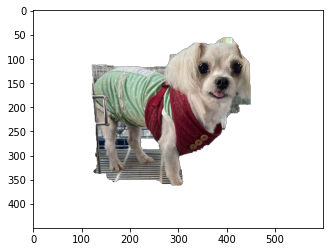

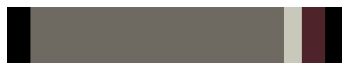

21
hist [0.83181111 0.0637     0.05201111 0.00958148 0.0428963 ] 
clu [[175.4242671  165.66205212 156.99220568]
 [204.42717825 200.11738326 195.65582289]
 [ 83.28239845  74.56518375  73.84061896]
 [149.41519862 132.66260794 122.53920553]]


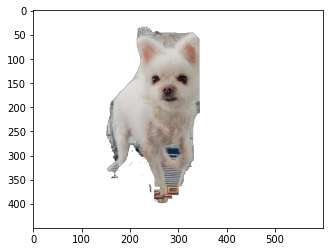

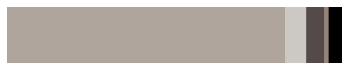

22
hist [0.79775926 0.05106667 0.05281852 0.03431481 0.06404074] 
clu [[169.89373    128.33670352 106.81124527]
 [ 86.69972683  50.99166492  39.19962177]
 [200.14227424 175.39235477 159.12402019]
 [127.46238054  86.64373009  69.69614828]]


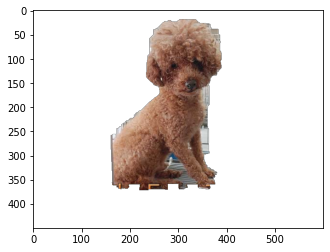

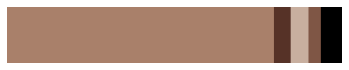

23
hist [0.8340037  0.05215185 0.0365     0.02427037 0.05307407] 
clu [[164.32942097 156.55278133 150.31441172]
 [205.93080357 202.16781656 197.57528409]
 [ 92.11214242  71.77008521  66.66570298]
 [134.38354156 120.82180498 114.29050045]]


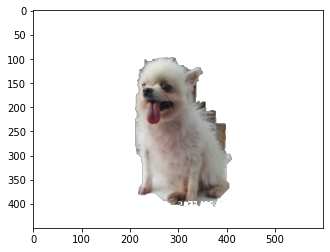

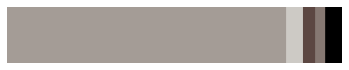

24
hist [0.06197778 0.80937407 0.03398889 0.02782963 0.06682963] 
clu [[1.36592643e-01 9.92207126e-02 9.71935589e-02]
 [9.79998917e+01 6.57492961e+01 4.50342214e+01]
 [2.03528753e+02 1.97804803e+02 1.84239093e+02]
 [1.36190748e+02 1.09014443e+02 8.31338609e+01]]


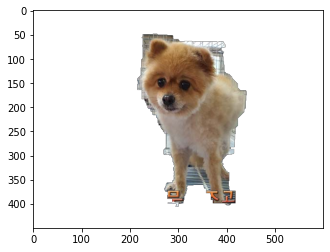

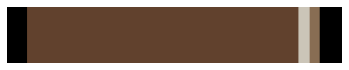

25
hist [0.83812963 0.03384074 0.0537037  0.0186963  0.05562963] 
clu [[196.58254124 188.78367748 178.38348083]
 [139.25410968 121.07970714 106.55905512]
 [ 93.08509366  73.53826226  63.83160622]
 [168.31914752 155.38640287 140.78316293]]


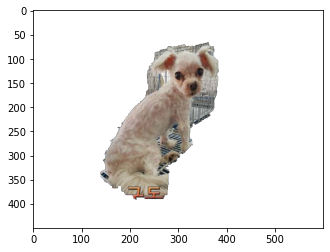

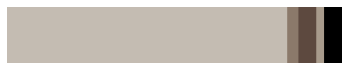

26
hist [0.81954074 0.06341111 0.03296667 0.04557407 0.03850741] 
clu [[120.47797164 114.97076501 107.80836786]
 [218.65501401 214.76302521 212.59652661]
 [ 78.43222695  74.14576521  70.14413015]
 [164.5542134  156.33707219 148.65247819]]


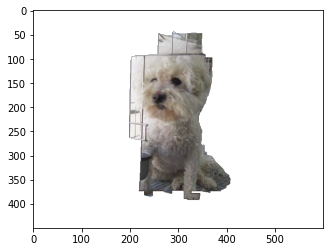

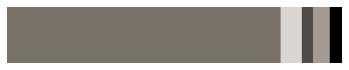

27
hist [0.80574815 0.06623333 0.03282593 0.0524963  0.0426963 ] 
clu [[175.34252874 151.57448837 127.44216428]
 [ 71.70205325  47.43501805  31.68118231]
 [208.67081575 191.2218706  170.5338256 ]
 [138.15086957 111.47904348  87.49747826]]


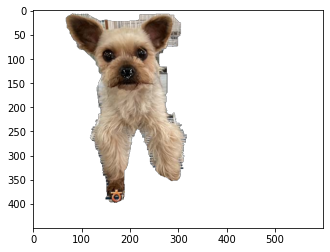

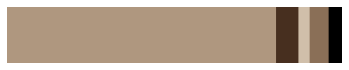

28
hist [0.83915926 0.0528963  0.02379259 0.03049259 0.05365926] 
clu [[136.59094096 127.45161969 118.11828636]
 [216.51046349 214.30754922 209.41109905]
 [ 89.01309726  80.59810817  74.8260975 ]
 [176.86302033 169.6216291  159.62391094]]


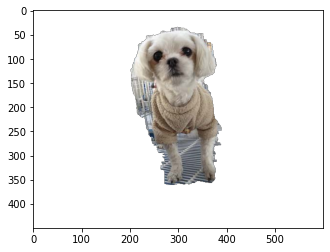

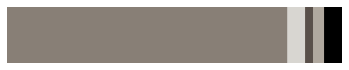

29
hist [0.85396667 0.03605556 0.03825556 0.0358963  0.03582593] 
clu [[172.34516096 155.04011108 136.40080222]
 [ 73.99149348  57.97960367  45.79690672]
 [211.76370569 201.31234542 186.56440643]
 [122.22664181 104.77429045  89.39475865]]


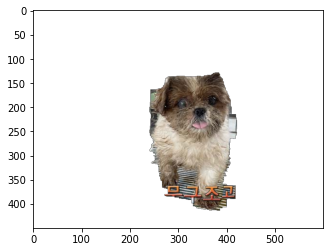

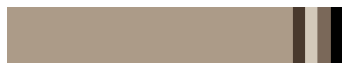

30
hist [0.24913704 0.42672222 0.10042222 0.1940963  0.02962222] 
clu [[  0.48393817   0.42438656   0.43199868]
 [168.17854661 149.0181765  125.32125224]
 [196.36702329 183.06259959 163.18895591]
 [115.0887218   95.18984962  78.79974937]]


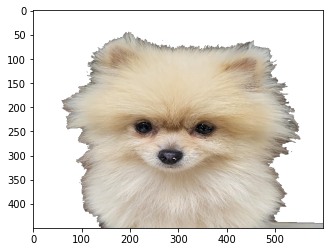

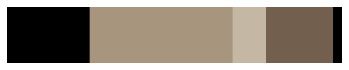

31
hist [0.68051852 0.05681111 0.17282222 0.03467778 0.05517037] 
clu [[177.21367132 156.6797211  152.38492115]
 [ 45.54010638  49.0669369   55.34315618]
 [223.26572159 202.68258367 195.15028779]
 [ 96.67154068  94.86001744  95.95948756]]


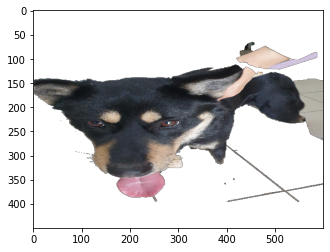

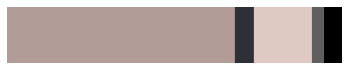

32
hist [0.84877778 0.04690741 0.03145926 0.02515185 0.0477037 ] 
clu [[171.54975183 157.11644213 153.0254471 ]
 [120.89458151 105.28662496  99.11533467]
 [214.45920471 212.05758468 209.10810015]
 [ 39.80571296  36.0157572   36.64278507]]


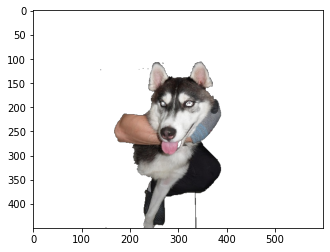

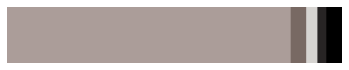

33
hist [0.76903704 0.03904074 0.08804815 0.05897778 0.0448963 ] 
clu [[194.33327014 200.80890995 211.36492891]
 [119.84076968 115.29421897 114.52386354]
 [159.50680549 161.67396349 168.23847457]
 [ 84.04414444  70.94376346  66.84652973]]


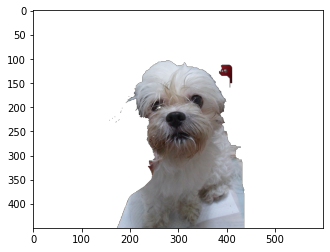

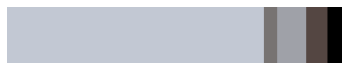

34
hist [0.8295037  0.04348519 0.03811111 0.03818148 0.05071852] 
clu [[142.852569   109.02072187  88.3844586 ]
 [214.27751289 204.95767247 196.22574681]
 [179.98268021 159.75055636 142.83580068]
 [ 97.49018459  65.48747436  54.25585995]]


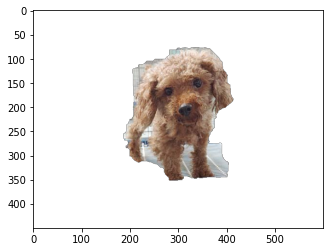

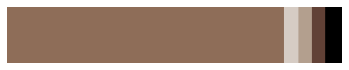

35
hist [0.14425185 0.50393704 0.11175926 0.10704074 0.13301111] 
clu [[  1.32553013   1.07673147   1.00787668]
 [ 79.18101945  66.2639771   52.81256376]
 [206.48114475 193.45717533 172.85642456]
 [123.14761718 108.69280954  89.88256706]]


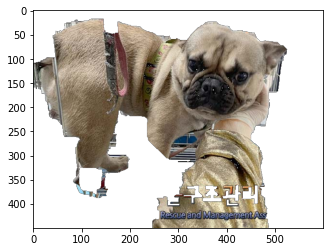

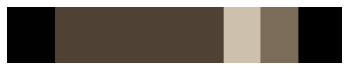

36
hist [0.75647037 0.08021111 0.07153704 0.06778148 0.024     ] 
clu [[203.76686095 194.08978629 178.87200481]
 [139.34144952 119.95099207  97.50106201]
 [171.49838789 155.47456145 135.70244276]
 [ 87.33144346  77.96920012  64.15691082]]


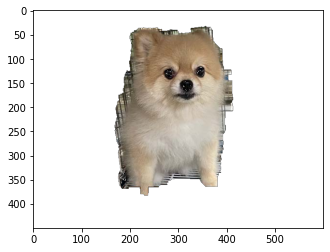

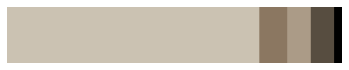

37
hist [0.85548148 0.03477778 0.02802593 0.05594444 0.02577037] 
clu [[223.22206838 219.59250186 215.85791884]
 [ 78.32115537  73.48522817  58.08942232]
 [123.85128239 128.89363112  96.10570614]
 [179.76293847 168.53033353 153.49238068]]


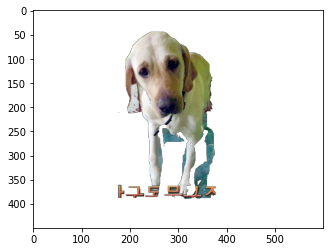

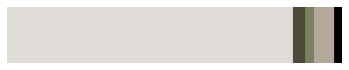

38
hist [0.75552222 0.04064074 0.10043333 0.04941481 0.05398889] 
clu [[130.95518437 117.0473713  101.22663381]
 [ 39.5140583   34.36264141  33.02177838]
 [176.71688195 159.06999099 147.94059778]
 [ 84.75239726  78.29054795  62.23534247]]


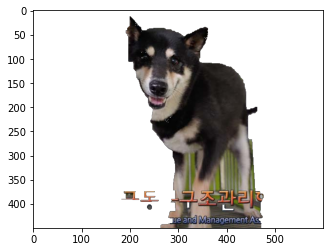

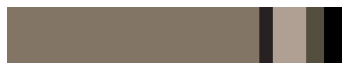

39
hist [0.15344856 0.13902263 0.31133694 0.19945301 0.19673886] 
clu [[112.22237741 106.28130892  99.3169352 ]
 [ 83.4342929  151.49936237 205.89449676]
 [ 52.14632756  47.91385218  51.61967484]
 [164.13608745 161.04901802 150.26990254]]


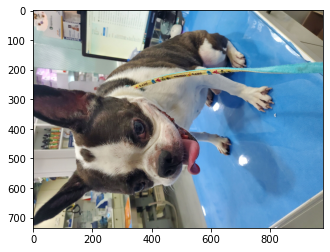

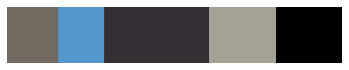

40
hist [0.07208148 0.75137778 0.01826667 0.07361481 0.08465926] 
clu [[  0.55070535   0.51881426   0.4638502 ]
 [212.35291734 217.04720421 211.55125608]
 [168.49230072 167.44962762 162.41279187]
 [122.83946754 120.80936219 114.67681932]]


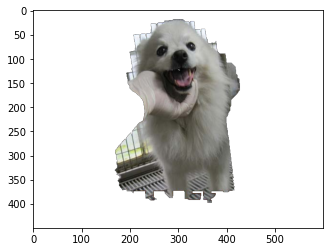

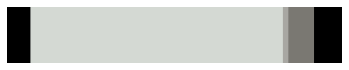

41
hist [0.7537     0.0785     0.06914815 0.0609037  0.03774815] 
clu [[182.69043601 172.6241444  160.10698547]
 [143.94563294 132.96064554 120.16669347]
 [226.71491201 216.26840407 201.34208123]
 [ 94.66062945  82.47436659  72.45437451]]


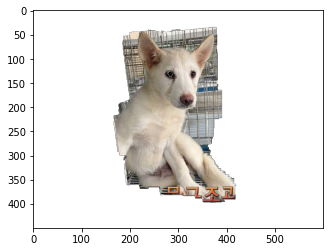

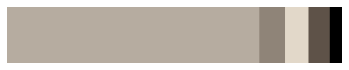

42
hist [0.8216963  0.06204074 0.02424074 0.04587778 0.04614444] 
clu [[124.21808353 100.34854156  76.57999168]
 [202.06850778 186.78425389 169.65257858]
 [ 97.14001468  69.64576368  43.64380657]
 [165.01336535 139.61352541 115.17462985]]


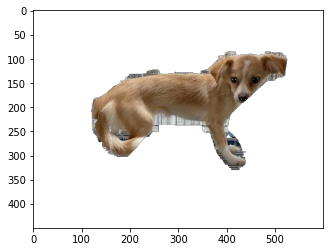

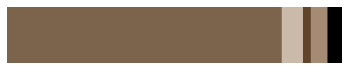

43
hist [0.71666667 0.05609259 0.11594074 0.02783704 0.08346296] 
clu [[146.64775586 134.80941348 126.51502714]
 [ 44.78727609  43.27070186  45.35621852]
 [213.90601704 203.39110756 187.07321619]
 [ 87.26779525  83.1705323   83.78645694]]


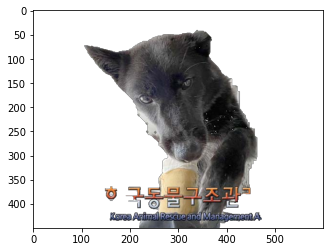

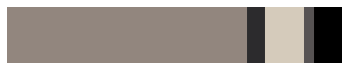

44
hist [0.82169259 0.06198889 0.04611852 0.02438889 0.04581111] 
clu [[124.18172625 100.30462197  76.52709535]
 [164.84677032 139.46962654 115.06010579]
 [201.99984853 186.61708573 169.40321115]
 [ 97.12828464  69.63595561  43.63212012]]


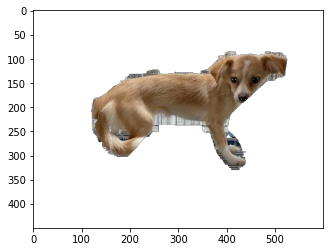

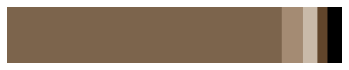

45
hist [0.7974     0.03402222 0.08711481 0.06498148 0.01648148] 
clu [[179.86658693 159.69740133 144.60041318]
 [133.42838956 118.29900276 106.7685975 ]
 [ 99.96172522  87.19251642  80.26546701]
 [192.66704213 206.62469025 207.31944132]]


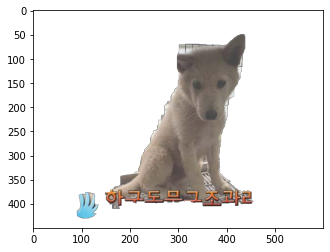

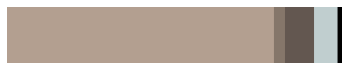

46
hist [0.86166667 0.04251852 0.04544444 0.01657778 0.03379259] 
clu [[192.94809387 174.78749019 157.51138445]
 [225.95899568 209.8626396  193.42455368]
 [ 93.88789837  79.90461333  68.78716292]
 [151.21340195 134.11135443 118.30318625]]


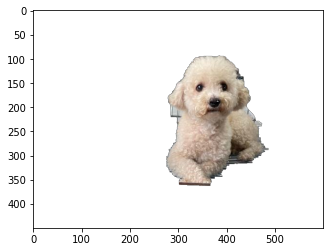

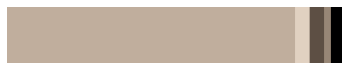

47
hist [0.72798519 0.09957037 0.0224963  0.08684074 0.06310741] 
clu [[ 87.39704679  68.86297701  53.88964517]
 [177.65114366 144.17179529 114.28978114]
 [ 55.26868085  44.97834043  38.95808511]
 [119.88891507  98.0243256   78.6428908 ]]


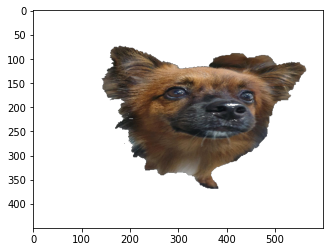

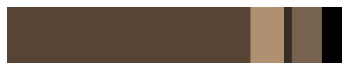

48
hist [0.66002222 0.1293037  0.08694074 0.09435926 0.02937407] 
clu [[117.76202872  86.5278334   59.98226443]
 [163.70691641 131.36092503 101.94726287]
 [ 69.92520395  43.95795419  22.25203954]
 [208.07199798 194.51119828 176.06946729]]


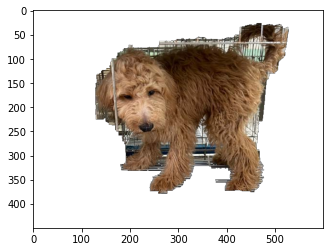

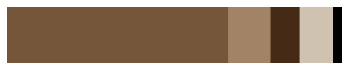

49
hist [0.77443333 0.05274444 0.04753333 0.04474444 0.08054444] 
clu [[166.87572884 155.61482262 142.12096944]
 [ 73.38385873  65.35791186  59.73185656]
 [210.02979886 204.817482   197.15950666]
 [117.5702487  108.61897292  98.53245974]]


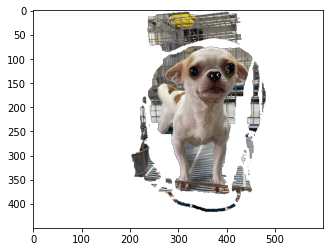

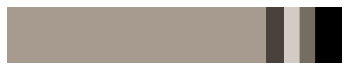

50
hist [0.08572963 0.75179259 0.07514815 0.05958148 0.02774815] 
clu [[  0.31457707   0.21525198   0.24031233]
 [139.3307917  121.57057979 111.88468584]
 [ 67.17909986  53.61047483  51.04884542]
 [182.32869751 167.89582776 155.46683605]]


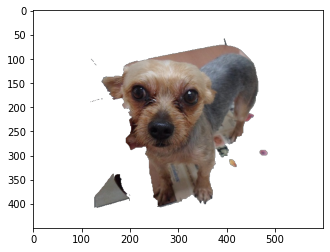

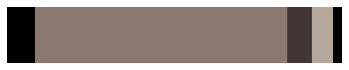

51
hist [0.80340741 0.05684815 0.05507778 0.02664815 0.05801852] 
clu [[199.93395179 173.10067289 148.3709414 ]
 [114.59555526  86.36903407  64.71356851]
 [236.86942631 225.86386998 210.45617447]
 [160.59604682 131.74477068 107.95336788]]


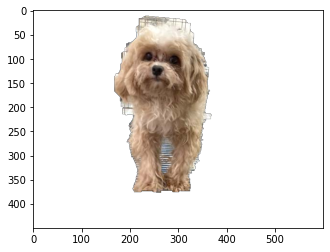

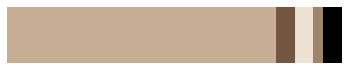

52
hist [0.71993333 0.07937407 0.08632222 0.04803704 0.06633333] 
clu [[162.99976699 141.12899618 116.86601734]
 [122.52686836 103.04520912  82.52883956]
 [ 69.33692451  59.72461634  49.99186173]
 [207.63589229 188.7670179  164.54524168]]


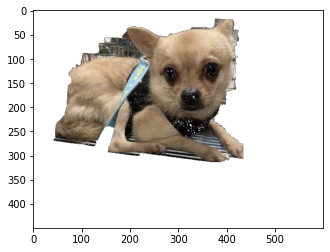

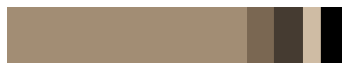

53
hist [0.77171111 0.08704444 0.02458889 0.07132593 0.04532963] 
clu [[119.48085523 100.05268538  75.92806338]
 [228.64021084 226.76370482 222.97710843]
 [ 73.61400229  51.3532253   28.87561026]
 [159.64268253 147.78414276 131.51955671]]


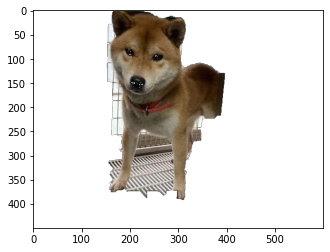

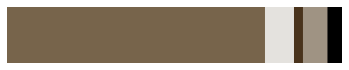

54
hist [0.8714     0.02632222 0.03332963 0.03764444 0.0313037 ] 
clu [[138.73994374 129.35471167 127.97651195]
 [ 95.15378636  75.37841439  75.17721519]
 [ 55.95493013  39.03660697  40.49360362]
 [174.41768257 174.25245591 177.51082968]]


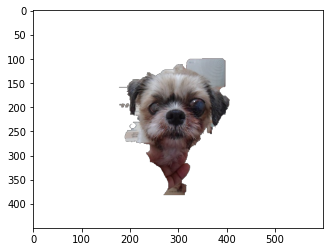

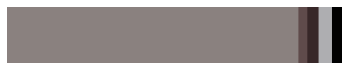

55
hist [0.19672963 0.26014074 0.25113333 0.20866296 0.08333333] 
clu [[175.66130427 173.36418012 168.48542231]
 [134.35977688 131.43757286 128.75536766]
 [218.59565889 216.95067408 212.91101085]
 [ 40.63736557  40.76366545  46.2157586 ]]


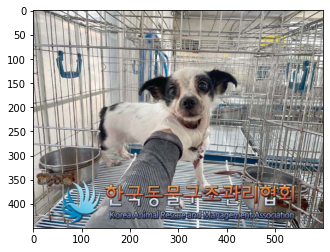

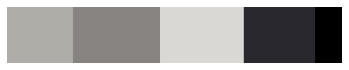

56
hist [0.9004     0.04572222 0.01915556 0.01775556 0.01696667] 
clu [[119.66302589 111.44765372 100.48195793]
 [207.17131783 204.10968992 197.76356589]
 [100.21928363  75.55685131  56.79945856]
 [160.18840263 154.17221007 145.17964989]]


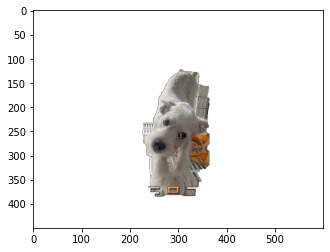

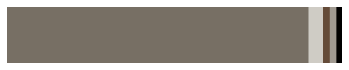

57
hist [0.14041067 0.16443067 0.37253244 0.15504711 0.16757911] 
clu [[ 78.19520916  71.76830769  69.33616851]
 [243.98360247 242.67478874 241.51571986]
 [138.9980119  111.820371   101.56138725]
 [183.14984496 154.19634509 138.44299839]]


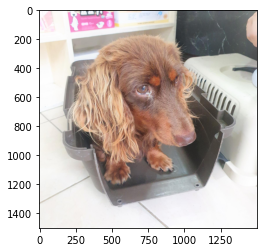

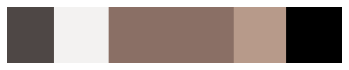

58
hist [0.78405926 0.06675556 0.06263333 0.06846296 0.01808889] 
clu [[168.09023014 156.00005532 144.22870104]
 [129.55558834 119.4532043  109.3688186 ]
 [202.21528683 189.74038462 175.87358757]
 [ 75.91123411  70.14924149  63.46145961]]


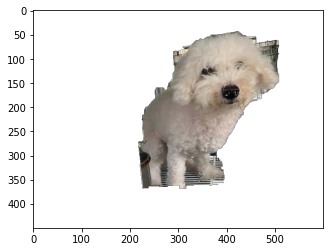

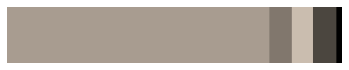

59
hist [0.1083037  0.60411852 0.05874074 0.10865185 0.12018519] 
clu [[2.33285516e-01 1.73103567e-01 1.49826510e-01]
 [2.02980426e+02 1.92458610e+02 1.75329292e+02]
 [1.78684788e+02 1.51553817e+02 1.23644639e+02]
 [8.41843526e+01 6.80364350e+01 5.31133840e+01]]


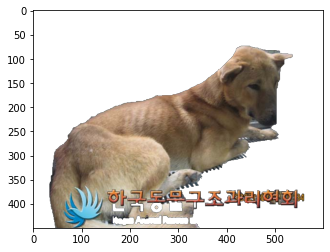

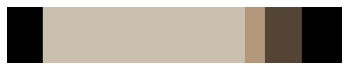

60
hist [0.79777407 0.06967778 0.03056296 0.06147037 0.04051481] 
clu [[120.59861518 112.97933422 111.50242344]
 [239.47850829 234.81777455 233.8586996 ]
 [ 67.5977973   60.70203418  56.36807896]
 [179.15508708 162.17048579 156.81044913]]


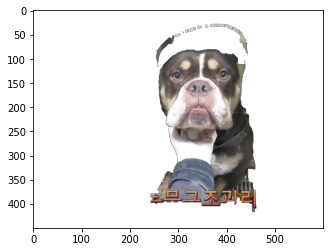

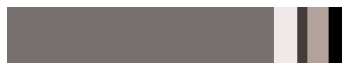

61
hist [0.8861037  0.04075556 0.00829259 0.01667778 0.04817037] 
clu [[ 70.80904797  60.31304506  58.32040334]
 [195.95797944 178.55073759 167.23513634]
 [110.03419942  96.68132356  94.56717744]
 [ 42.30069178  32.68416603  28.97817064]]


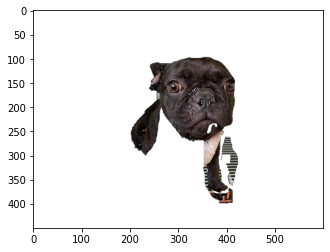

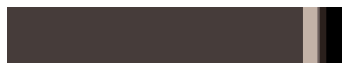

62
hist [0.58855556 0.13245926 0.06316296 0.18427407 0.03154815] 
clu [[158.81654857 153.48697205 149.29266864]
 [127.5006724  114.76425189 106.8856341 ]
 [184.81482452 183.4608333  184.14318814]
 [ 67.24260216  63.26773133  54.3479333 ]]


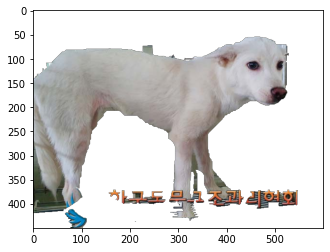

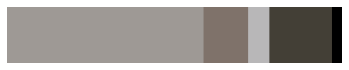

63
hist [0.80382593 0.0491963  0.05341852 0.04107778 0.05248148] 
clu [[164.76998946 155.32660744 154.0869598 ]
 [113.07902946 103.00360485 103.01407279]
 [227.89267722 223.95528967 224.57466715]
 [ 51.50862557  48.89020079  52.14684672]]


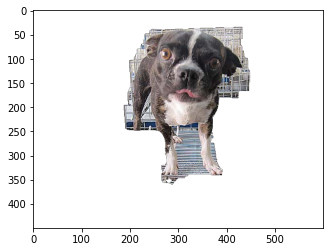

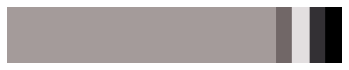

64
hist [0.8848963  0.03216667 0.03001111 0.01810741 0.03481852] 
clu [[193.23497582 164.51795994 148.1197329 ]
 [238.53961799 225.40049291 214.46605052]
 [ 62.3460045   47.59472716  45.56570611]
 [151.37099009 115.36502185  97.09634445]]


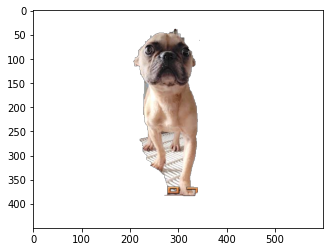

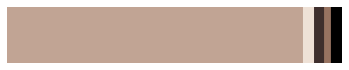

65
hist [0.73664444 0.0906037  0.01861111 0.11652963 0.03761111] 
clu [[165.55807711 123.82141695  90.78395966]
 [202.9853058  188.18069897 177.5019857 ]
 [134.71004843  88.99945839  58.38581624]
 [ 80.108857    53.32765957  39.6757051 ]]


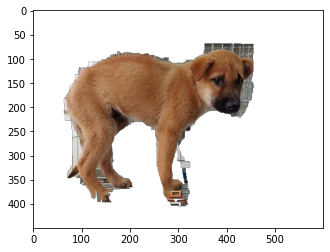

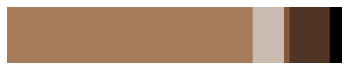

66
hist [0.82632222 0.05268148 0.0257     0.06664815 0.02864815] 
clu [[136.51967731 113.09266924  91.13461943]
 [203.88626485 189.17762967 171.25572298]
 [171.45418216 145.66259644 119.80451796]
 [ 89.41232841  71.79279979  57.03328153]]


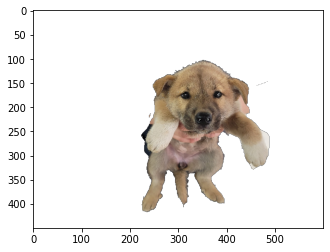

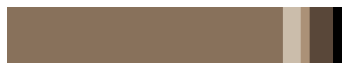

67
hist [0.79635185 0.06962222 0.06774815 0.01988889 0.04638889] 
clu [[176.25852907 171.9515889  167.90360293]
 [209.52847306 205.27505738 202.10717018]
 [ 88.69679955  80.56934307  78.33483062]
 [144.4531886  137.68225716 132.47769176]]


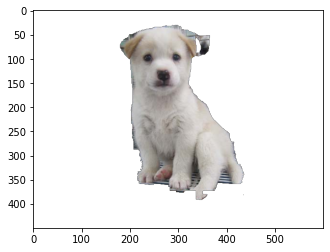

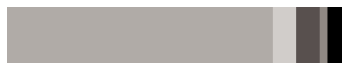

68
hist [0.65691111 0.09958889 0.09402222 0.06302593 0.08645185] 
clu [[160.88258069 135.11607907 107.46465135]
 [125.84036965  95.41048932  70.80822242]
 [190.03624796 176.46007471 157.1814149 ]
 [ 79.1584048   56.18953688  44.36273585]]


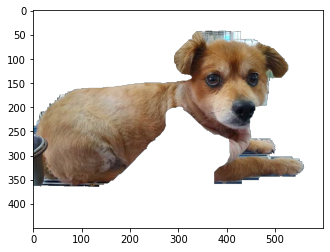

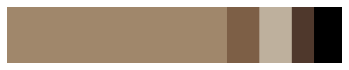

69
hist [0.09188889 0.74375185 0.03293333 0.06643333 0.06499259] 
clu [[1.40728493e-01 8.58126077e-02 9.09869620e-02]
 [1.94823165e+02 1.57018834e+02 1.36955453e+02]
 [1.55829396e+02 1.11072767e+02 8.89230641e+01]
 [7.63877025e+01 4.15106773e+01 2.98000802e+01]]


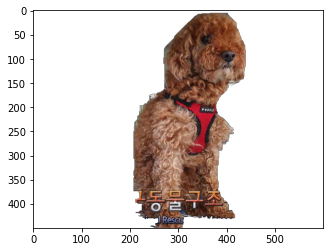

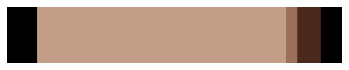

70
hist [0.8480963  0.05806667 0.0346963  0.04482593 0.01431481] 
clu [[191.61870549 171.91232197 157.61857833]
 [158.21755889 129.35995717 108.49004283]
 [215.28988021 211.93019413 220.42379182]
 [ 98.90580276  63.25162633  48.89149102]]


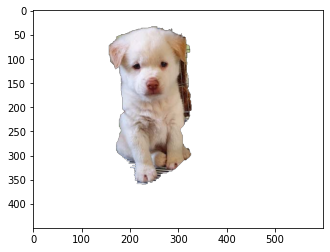

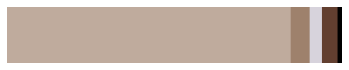

71
hist [0.63014444 0.07321111 0.1399963  0.02348148 0.13316667] 
clu [[140.07464342 102.04737664  79.75288544]
 [ 70.77465534  35.26569818  22.05480141]
 [177.29521862 174.13573451 166.47750865]
 [107.03127352  63.99696184  43.86899685]]


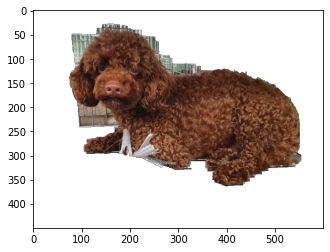

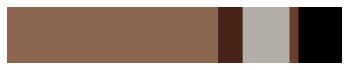

72
hist [0.59415926 0.08086296 0.24996296 0.04992963 0.02508519] 
clu [[164.96159298 156.52421014 142.52256413]
 [115.59850695 107.47442715  96.93342023]
 [228.32641832 223.45505242 208.00721243]
 [ 64.14228605  57.40361267  59.28501629]]


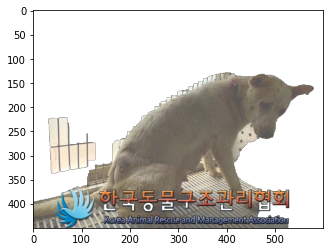

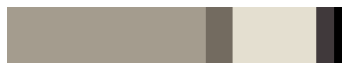

73
hist [0.78836296 0.05008519 0.04821852 0.05316296 0.06017037] 
clu [[164.54141354 142.89665136 126.65535635]
 [ 73.72759362  55.071593    39.80263966]
 [210.96215389 191.11005983 177.47940726]
 [125.88753856 100.31122764  80.27526218]]


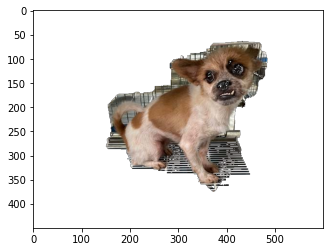

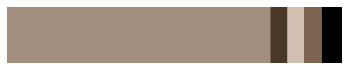

74
hist [0.86185556 0.04234074 0.01671481 0.0343963  0.04469259] 
clu [[193.8302612  175.62278326 158.32602429]
 [ 94.43090148  80.38814194  69.19175667]
 [152.08058451 134.89620716 119.00354572]
 [226.27433997 210.24210877 193.82143749]]


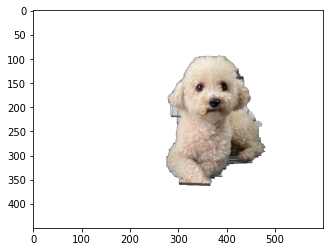

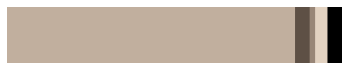

75
hist [0.09573704 0.7054     0.09031481 0.04712593 0.06142222] 
clu [[2.50515892e-01 1.94873114e-01 1.90210400e-01]
 [1.73119209e+02 1.48974587e+02 1.16045507e+02]
 [9.92142688e+01 8.01204572e+01 5.87163579e+01]
 [2.04606948e+02 1.84388133e+02 1.57983420e+02]]


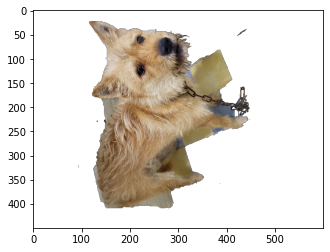

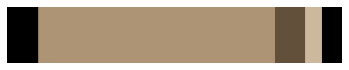

76
hist [0.08412593 0.74332222 0.0581963  0.03521852 0.07913704] 
clu [[  0.31608082   0.26457238   0.24013353]
 [108.91292188  82.80842814  59.1006801 ]
 [234.85682889 218.21172161 199.4107797 ]
 [159.15778621 129.97989597 103.60640142]]


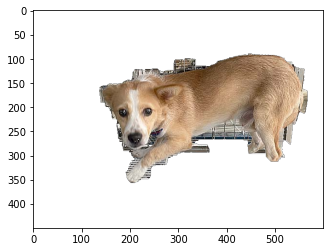

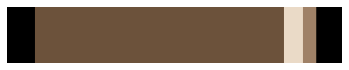

77
hist [0.75672963 0.08252593 0.09173333 0.02476667 0.04424444] 
clu [[188.30967221 167.14102507 141.26510022]
 [160.76085206 136.02661674 107.89111702]
 [107.02403846  88.3898738   67.92563101]
 [219.0814491  205.45330756 182.66251996]]


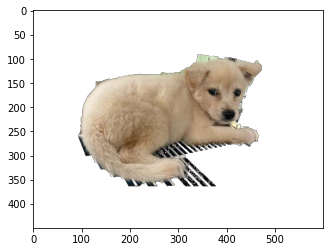

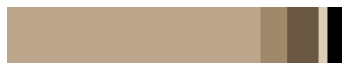

78
hist [0.85427778 0.06421852 0.00088148 0.02729259 0.05332963] 
clu [[ 94.57715304  61.81585604  42.07922272]
 [235.77731092 237.33193277 241.16386555]
 [120.31738718  93.38636672  74.36509012]
 [ 65.75013951  39.04310826  25.31940569]]


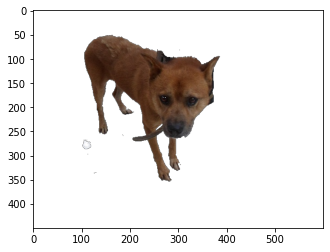

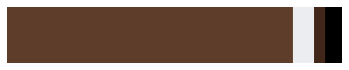

79
hist [0.86155185 0.03487037 0.04487407 0.02868519 0.03001852] 
clu [[185.96810427 159.09388577 135.27318004]
 [132.96950917 113.28218476  95.32036027]
 [227.43169187 206.3453535  185.46490888]
 [ 91.58788701  72.6424078   53.78524732]]


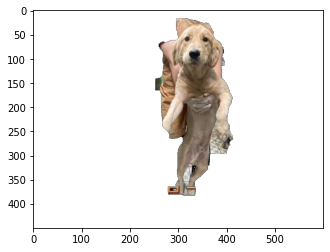

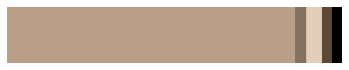

80
hist [0.90978889 0.02893704 0.02233704 0.03402593 0.00491111] 
clu [[106.00755055  93.07269004  81.54722293]
 [166.61236327 137.81537952 111.68760358]
 [ 50.11636522  45.85334496  42.74231859]
 [212.07963937 197.17054846 186.62584523]]


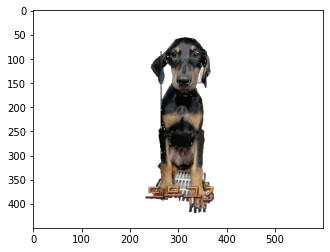

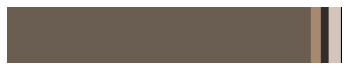

In [ ]:
for i in range(1,81):
  images='/content/drive/MyDrive/sample (1)/3. background remove/80imagespng/abandoned'+str(i)+'.png'
  print(i)
  image = mpimg.imread(images)
  plt.imshow(image)
  image_color_cluster(images)